/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/926251200.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[feature].replace([float('inf'), float('-inf')], np.nan, inplace=True)
/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/926251200.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

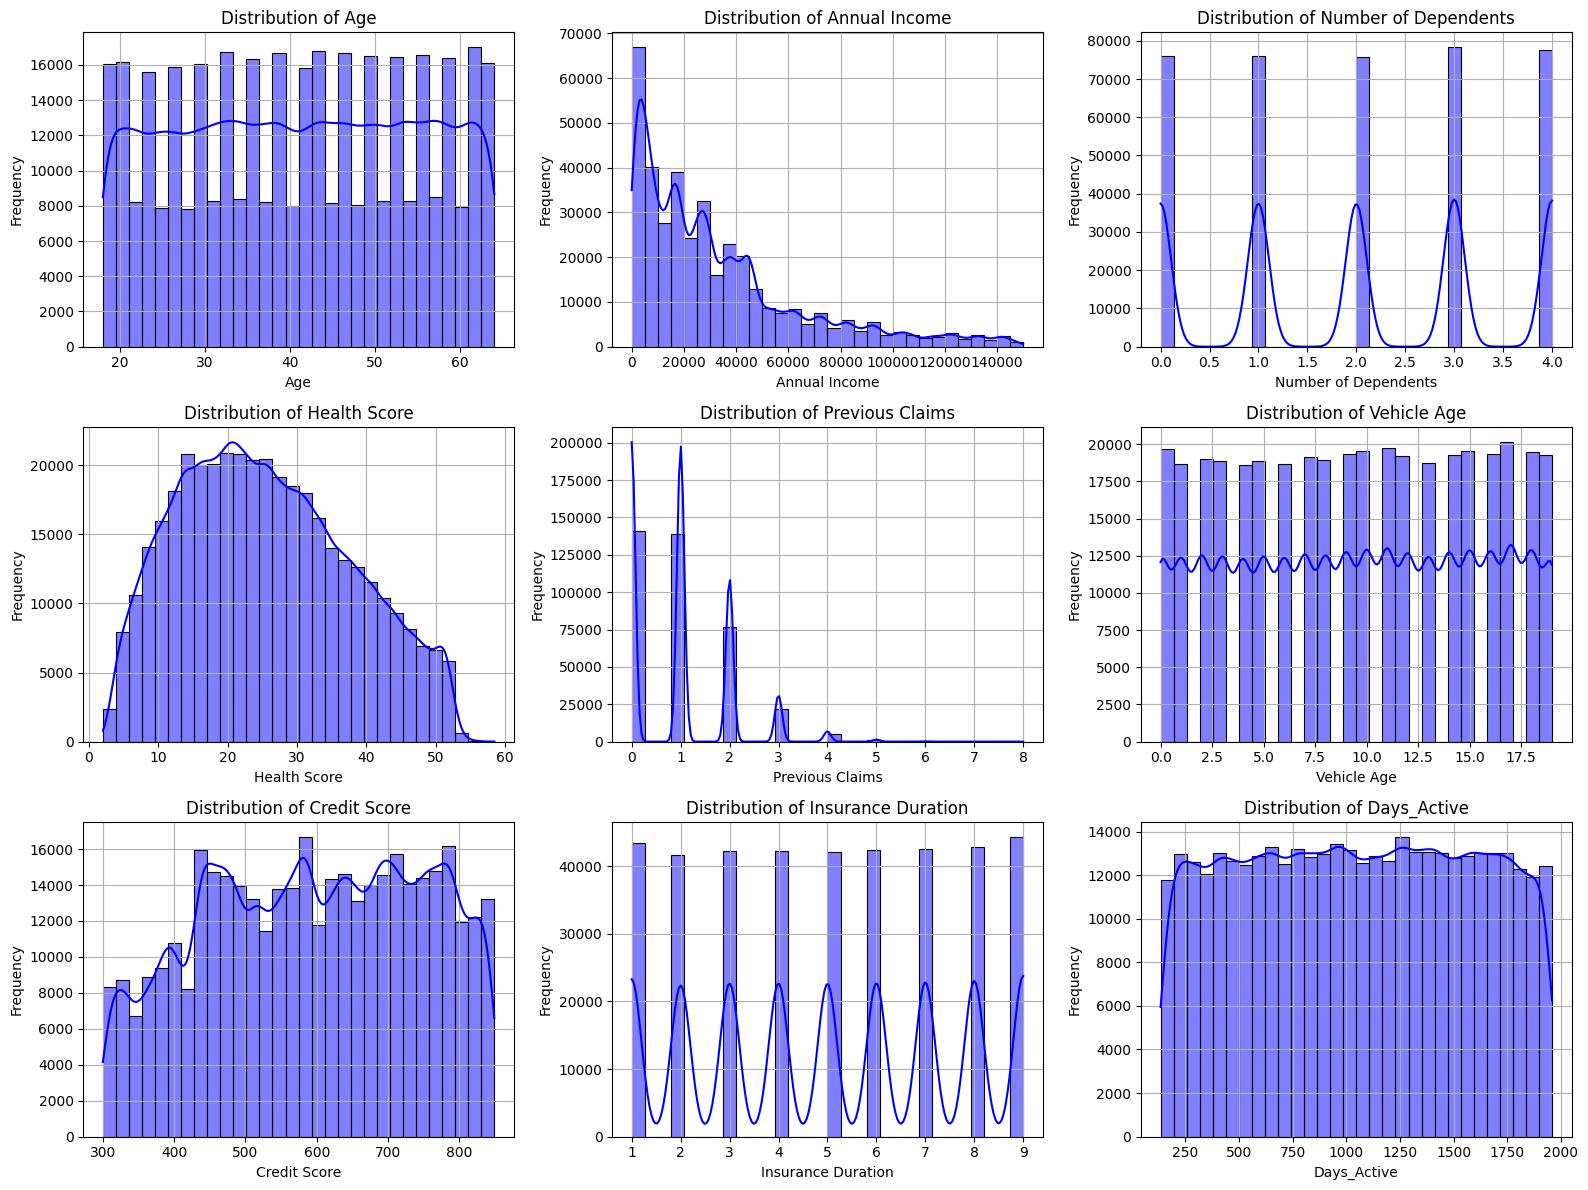

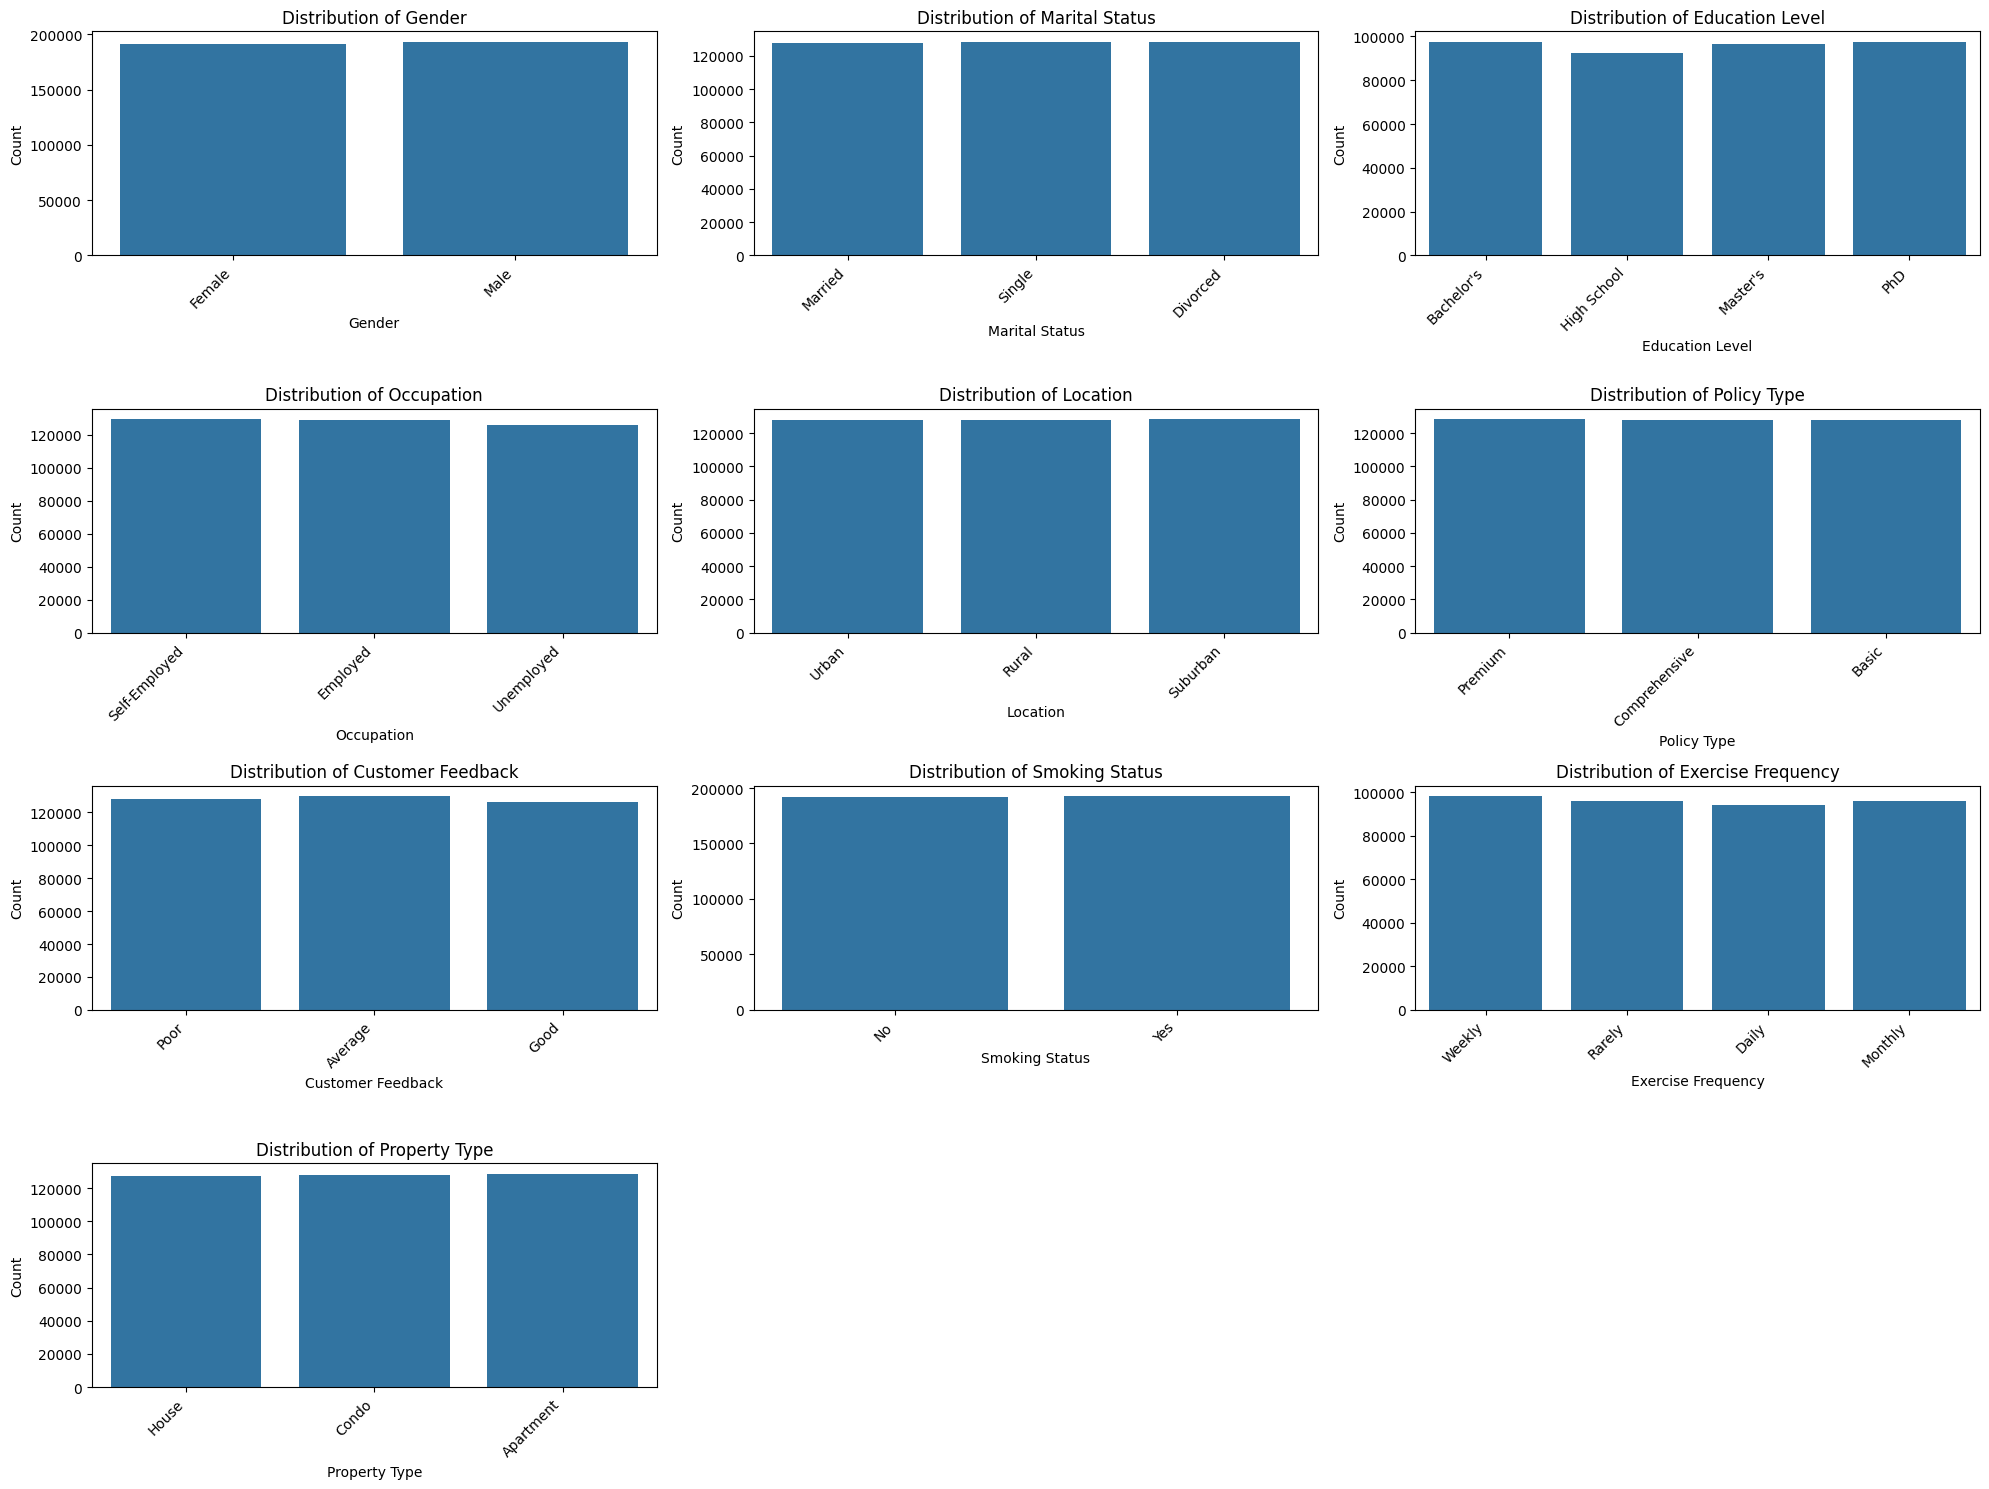

/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/926251200.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Premium Amount'].replace([float('inf'), float('-inf')], np.nan, inplace=True)


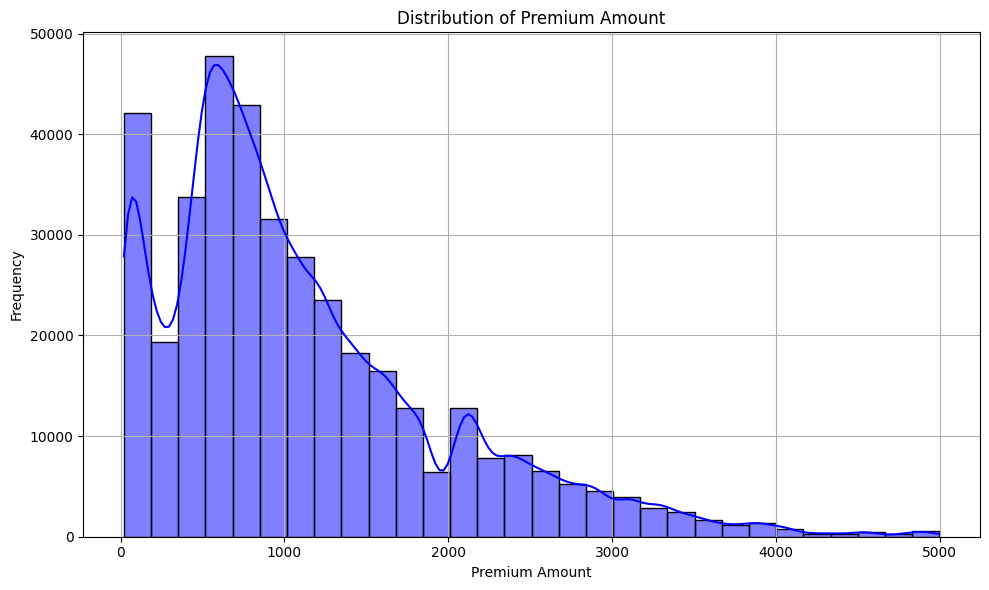

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv('train.csv')

# Drop the 'id' column as it is just an identifier
train.drop('id', axis=1, inplace=True)

# Replace infinite values with NaN globally
train.replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Convert Policy Start Date to datetime
train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])

# Use today's date dynamically
current_date = pd.Timestamp.now().normalize()  # normalize() sets time to midnight

# Calculate days active
train['Days_Active'] = (current_date - train['Policy Start Date']).dt.days

# Drop the Policy Start Date
train.drop('Policy Start Date', axis=1, inplace=True)

# Drop rows with missing values
train.dropna(inplace=True)

# Separate numerical features excluding 'Premium Amount'
numerical_features = train.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Premium Amount')  # Ensure the target is not included

# Visualizations
# 1. Distribution of Numerical Features (Grid Layout)
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    train[feature].replace([float('inf'), float('-inf')], np.nan, inplace=True)
    sns.histplot(train[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribution of Categorical Features (Grid Layout)
categorical_features = train.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=train, x=feature)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Distribution of Premium
plt.figure(figsize=(10, 6))
train['Premium Amount'].replace([float('inf'), float('-inf')], np.nan, inplace=True)
sns.histplot(train['Premium Amount'], kde=True, bins=30, color='blue')
plt.title(f'Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_insurance_data(df):
    """
    Preprocesses insurance data by scaling numerical variables
    """
    processed_df = df.copy()

    # processed_df['Annual Income'] = np.log1p(processed_df['Annual Income'])
    # processed_df['Premium Amount'] = np.log1p(processed_df['Premium Amount'])
    
    # Drop rows with missing values
    processed_df.dropna(inplace=True)

    # # Identify numerical columns excluding 'Premium Amount'
    # numerical_columns = processed_df.select_dtypes(include=['int64', 'float64']).columns
    # numerical_columns = numerical_columns[~numerical_columns.isin(['Premium Amount', 'Previous Claims', 'Number of Dependents'])].tolist()
    
    # # Initialize and fit StandardScaler
    # scaler = StandardScaler()
    
    # # Apply standardization to numerical columns
    # processed_df[numerical_columns] = scaler.fit_transform(processed_df[numerical_columns])
    
    return processed_df

# Example usage:
processed_df = preprocess_insurance_data(train)

/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/3890157911.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set3')
/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/3890157911.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set3')
/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62810/3890157911.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set3')
/var/folders/w4/14pr5x5s04gdgc7yxtr2vlgm0000gn/T/ipykernel_62

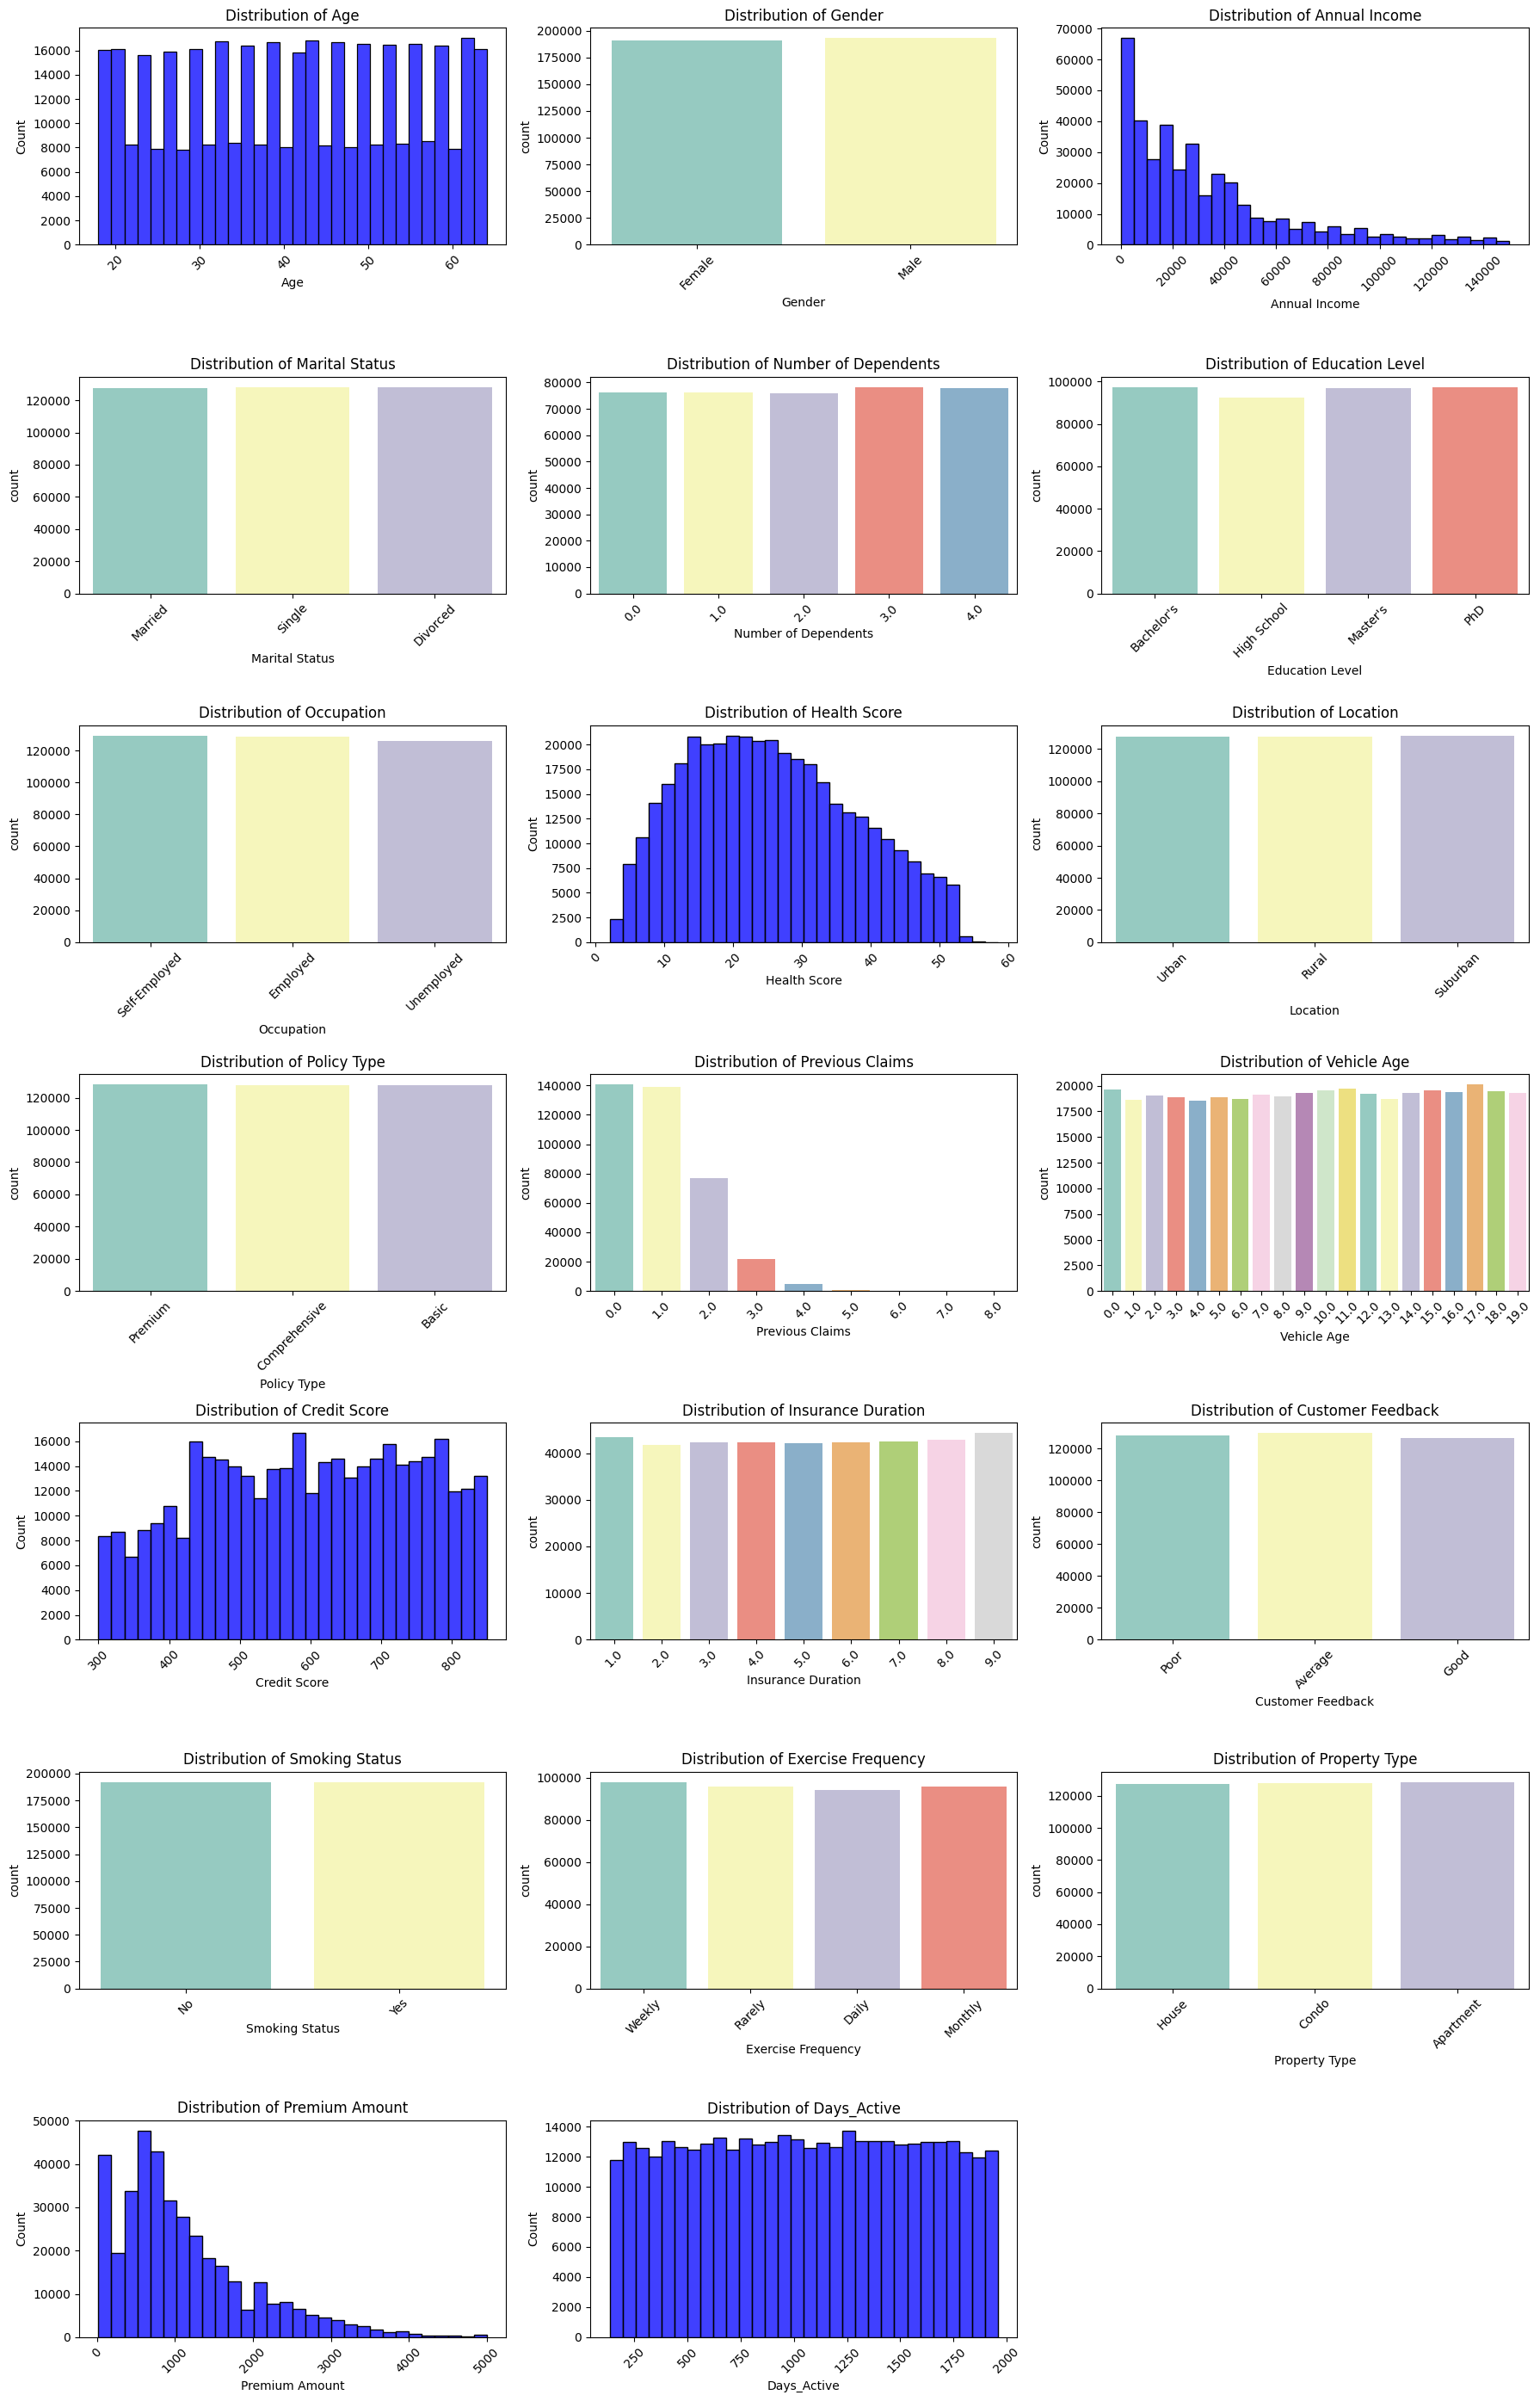

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_features(df):
    # Set up the matplotlib figure
    num_plots = len(df.columns)
    cols = 3
    rows = num_plots // cols + 1 if num_plots % cols else num_plots // cols

    plt.figure(figsize=(cols * 6, rows * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(rows, cols, i + 1)
        if df[feature].nunique() > 20:
            # Use histogram for numerical features
            sns.histplot(df[feature], kde=False, bins=30, color='blue')
        else:
            # Use count plot for categorical features with few unique values
            sns.countplot(x=df[feature], palette='Set3')
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Assuming 'processed_df' contains all preprocessed data
visualize_features(processed_df)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.base import BaseEstimator, TransformerMixin

class EnhancedFeatureTransformer(BaseEstimator, TransformerMixin):
    """Custom transformer for enhanced feature engineering"""
    
    def __init__(self, segment_type='default'):
        self.segment_type = segment_type
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        # # Base features (common across all segments)
        # X_copy['risk_score'] = X_copy['Credit Score'] * X_copy['Health Score']
        # X_copy['claims_health_interaction'] = X_copy['Previous Claims'] * X_copy['Health Score']
        # X_copy['credit_claims_interaction'] = X_copy['Credit Score'] * X_copy['Previous Claims']
        # X_copy['income_claim_ratio'] = X_copy['Annual Income'].clip(lower=1) / (X_copy['Previous Claims'] + 1)
        # X_copy['property_claim_ratio'] = X_copy['Previous Claims'] / (X_copy['Insurance Duration'] + 1)
        
        # # Temporal features
        # X_copy['days_per_claim'] = X_copy['Days_Active'] / (X_copy['Previous Claims'] + 1)
        # X_copy['insurance_intensity'] = X_copy['Insurance Duration'] / X_copy['Age'].clip(lower=1)
        # X_copy['claim_frequency'] = X_copy['Previous Claims'] / X_copy['Insurance Duration'].clip(lower=1)
        # X_copy['experience_factor'] = X_copy['Age'] * X_copy['Insurance Duration']
        # X_copy['loyalty_score'] = np.exp(-X_copy['Previous Claims']) * X_copy['Insurance Duration']
        
        # # Credit Score interactions (based on importance)
        # X_copy['credit_health_interaction'] = X_copy['Credit Score'] * X_copy['Health Score']
        # X_copy['credit_income_interaction'] = X_copy['Credit Score'] * X_copy['Annual Income']
        # X_copy['credit_age_interaction'] = X_copy['Credit Score'] * X_copy['Age']
        # X_copy['credit_duration_interaction'] = X_copy['Credit Score'] * X_copy['Insurance Duration']
        
        # # Segment-specific features
        # if self.segment_type == 'budget':
        #     # Budget Basic specific features
        #     X_copy['income_stability'] = X_copy['Days_Active'] * X_copy['Annual Income']
        #     X_copy['risk_adjusted_income'] = X_copy['Annual Income'] / (X_copy['Previous Claims'] + 1)
        #     X_copy['credit_risk_ratio'] = X_copy['Credit Score'] / (X_copy['Previous Claims'] + 1)
        #     X_copy['affordability_index'] = X_copy['Annual Income'] / (X_copy['Age'] + 1)
        #     X_copy['claim_income_ratio'] = X_copy['Previous Claims'] / X_copy['Annual Income'].clip(lower=1)
        #     X_copy['duration_income_ratio'] = X_copy['Insurance Duration'] / X_copy['Annual Income'].clip(lower=1)

        # elif self.segment_type == 'high_value':
        #     # High Value specific features
        #     X_copy['wealth_indicator'] = X_copy['Credit Score'] * X_copy['Annual Income']
        #     X_copy['premium_potential'] = X_copy['Annual Income'] * X_copy['Health Score']
        #     X_copy['loyalty_value'] = X_copy['Insurance Duration'] * X_copy['Annual Income']
        #     X_copy['risk_adjusted_wealth'] = X_copy['wealth_indicator'] / (X_copy['Previous Claims'] + 1)
        #     X_copy['high_value_score'] = (X_copy['Credit Score'] + X_copy['Health Score']) * X_copy['Annual Income']
        #     X_copy['premium_sustainability'] = X_copy['Annual Income'] * X_copy['Insurance Duration']

        return X_copy

class InsuranceSegmentModel:
    def __init__(self, df):
        """Initialize the model with a DataFrame"""
        self.df = df
        self.processed_df = None
        self.segment_results = {}
        self.cv_results = {}

        # # Calculate derived metrics for segmentation
        # self.df['claim_frequency'] = self.df['Previous Claims'] / (self.df['Insurance Duration'] + 1)
        # self.df['health_claim_ratio'] = self.df['Previous Claims'] / (self.df['Health Score'] + 1)
        # self.df['income_per_dependent'] = self.df['Annual Income'] / (self.df['Number of Dependents'] + 1)

        # Simplified segment definitions:
        self.segments = {
            'Low_Risk_Premium': (
                (self.df['Credit Score'] > self.df['Credit Score'].quantile(0.6)) & 
                (self.df['Health Score'] > self.df['Health Score'].quantile(0.6)) & 
                (self.df['Insurance Duration'] > self.df['Insurance Duration'].median())
            ),
            'High_Risk_Premium': (
                (self.df['Previous Claims'] >= 3) | 
                (self.df['Credit Score'] < self.df['Credit Score'].quantile(0.3)) |
                (self.df['Health Score'] < self.df['Health Score'].quantile(0.3))
            ),
            'Young_Urban_Professional': (
                (self.df['Age'] <= self.df['Age'].quantile(0.3)) & 
                (self.df['Location'] == 'Urban') & 
                (self.df['Annual Income'] > self.df['Annual Income'].median()) & 
                (self.df['Insurance Duration'] > 1)
            ),
            'Family_Suburban': (
                (self.df['Number of Dependents'] >= 2) & 
                (self.df['Location'] == 'Suburban') & 
                (self.df['Marital Status'] == 'Married') & 
                (self.df['Insurance Duration'] > self.df['Insurance Duration'].median())
            ),
            'Senior_Stable': (
                (self.df['Age'] >= self.df['Age'].quantile(0.7)) & 
                (self.df['Insurance Duration'] > self.df['Insurance Duration'].quantile(0.6)) & 
                (self.df['Credit Score'] > self.df['Credit Score'].median())
            ),
            'Budget_Basic': (
                (self.df['Annual Income'] <= self.df['Annual Income'].quantile(0.3)) & 
                (self.df['Policy Type'] == 'Basic') & 
                (self.df['Insurance Duration'] > 1)
            ),
            'Premium_Healthy': (
                (self.df['Policy Type'] == 'Premium') & 
                (self.df['Exercise Frequency'].isin(['Daily', 'Weekly'])) & 
                (self.df['Health Score'] > self.df['Health Score'].quantile(0.7)) & 
                (self.df['Annual Income'] > self.df['Annual Income'].median())
            ),
            'High_Value_Property': (
                (self.df['Property Type'] == 'House') & 
                (self.df['Annual Income'] >= self.df['Annual Income'].quantile(0.75)) & 
                (self.df['Policy Type'] == 'Premium') & 
                (self.df['Credit Score'] > self.df['Credit Score'].quantile(0.6))
            )
        }

        # Define model configurations
        self.segment_configs = {
            'High_Value_Property': {
                'model': StackingRegressor(
                    estimators=[
                        ('rf', RandomForestRegressor(
                            n_estimators=80,  # Reduced complexity
                            max_depth=6,       # Lower depth to prevent overfitting
                            min_samples_leaf=20,
                            random_state=42
                        )),
                        ('gbm', GradientBoostingRegressor(
                            n_estimators=80,  # Reduced complexity
                            learning_rate=0.08,  # Slightly lower to improve generalization
                            max_depth=4,  # Lower depth to prevent overfitting
                            random_state=42
                        ))
                    ],
                    final_estimator=LassoCV(cv=5, random_state=42),  # Increased CV folds
                    cv=5,  # Increased CV folds
                    n_jobs=-1
                ),
                'feature_transformer': EnhancedFeatureTransformer(segment_type='high_value')
            },
            'Budget_Basic': {
                'model': RandomForestRegressor(  # Adjusted parameters for possibly better generalization
                    n_estimators=200,
                    max_depth=10,  # Slightly more depth to capture more complex patterns
                    min_samples_leaf=25,  # Allowing more fine-grained leaf nodes
                    n_jobs=-1,
                    random_state=42
                ),
                'feature_transformer': EnhancedFeatureTransformer(segment_type='budget')
            },
            'High_Risk_Premium': {
                'model': GradientBoostingRegressor(  # Adjust parameters to improve fitting
                    n_estimators=200,  # More estimators for better learning
                    learning_rate=0.08,  # Slightly lower to improve stability
                    max_depth=7,  # Increased depth to capture more complex relationships
                    random_state=42
                ),
                'feature_transformer': EnhancedFeatureTransformer()
            },
            'default': {
                'model': RandomForestRegressor(
                    n_estimators=120,  # Slightly more estimators
                    max_depth=10,  # Increased depth to potentially improve model capture
                    min_samples_leaf=25,  # Smaller leaf size for better granularity
                    n_jobs=-1,
                    random_state=42
                ),
                'feature_transformer': EnhancedFeatureTransformer()
            }
        }
    
    def create_segment_pipeline(self, segment_name):
        """Creates a pipeline specific to a segment"""
        config = self.segment_configs.get(segment_name, self.segment_configs['default'])
        
        # Define feature groups based on available columns
        numeric_features = [col for col in self.df.select_dtypes(include=['int64', 'float64']).columns 
                          if col != 'Premium Amount']
        
        categorical_features = [col for col in self.df.select_dtypes(include=['object', 'category']).columns
                              if col != 'Premium Amount']
        
        # Create transformers
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        
        # Create preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ],
            sparse_threshold=0
        )
        
        # Create pipeline
        return Pipeline([
            ('feature_transform', config['feature_transformer']),
            ('preprocessor', preprocessor),
            ('regressor', config['model'])
        ])
    
    def evaluate_predictions(self, y_true, y_pred):
        """Calculate comprehensive evaluation metrics"""
        return {
            'r2_score': r2_score(y_true, y_pred),
            'mae': mean_absolute_error(y_true, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
            'mape': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
            'median_ae': np.median(np.abs(y_true - y_pred))
        }
    
    def train_segment_model(self, X_seg, y_seg, segment_name):
        """Trains and evaluates a model for a specific customer segment"""
        # Create pipeline
        pipeline = self.create_segment_pipeline(segment_name)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_seg, y_seg, test_size=0.2, random_state=42
        )
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        train_predictions = pipeline.predict(X_train)
        test_predictions = pipeline.predict(X_test)
        
        # Calculate metrics
        train_metrics = self.evaluate_predictions(y_train, train_predictions)
        test_metrics = self.evaluate_predictions(y_test, test_predictions)
        
        # Perform cross-validation
        cv_scores = cross_val_score(
            pipeline, X_seg, y_seg,
            cv=5,
            scoring=make_scorer(r2_score),
            n_jobs=-1
        )
        
        results = {
            'model': pipeline,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'cv_scores': cv_scores,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_data': (X_test, y_test)
        }
        
        return results
    
    def analyze_feature_importance(self, segment_name):
        """Analyzes feature importance for a specific segment"""
        if segment_name not in self.segment_results:
            return None
        
        results = self.segment_results[segment_name]
        model = results['model']
        
        # Get feature names after preprocessing
        feature_names = []
        
        # Get numeric feature names
        num_features = model.named_steps['preprocessor'].transformers_[0][2]
        feature_names.extend(num_features)
        
        # Get encoded categorical feature names
        cat_features = model.named_steps['preprocessor'].transformers_[1][2]
        if len(cat_features) > 0:
            encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
            if hasattr(encoder, 'get_feature_names_out'):
                encoded_features = encoder.get_feature_names_out(cat_features)
                feature_names.extend(encoded_features)
        
        # Get feature importances
        if hasattr(model.named_steps['regressor'], 'feature_importances_'):
            importances = model.named_steps['regressor'].feature_importances_
        else:
            # For stacking regressor, use the average of base estimators
            importances = np.mean([
                est.feature_importances_ 
                for name, est in model.named_steps['regressor'].estimators_
                if hasattr(est, 'feature_importances_')
            ], axis=0)
        
        return pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
    
    def train_all_segments(self):
        """Trains models for all segments and generates performance summary"""
        # Define feature and target columns
        feature_cols = [col for col in self.df.columns if col != 'Premium Amount']
        target_col = 'Premium Amount'
        
        # Use the original dataframe directly
        self.processed_df = self.df.copy()
        
        # Train models for each segment
        for name, mask in self.segments.items():
            print(f"\nProcessing {name} segment...")
            X_seg = self.processed_df[feature_cols][mask]
            y_seg = self.processed_df[target_col][mask]
            print(f"\nSegment Length {len(X_seg)}...")

            if len(X_seg) >= 100:
                results = self.train_segment_model(X_seg, y_seg, name)
                self.segment_results[name] = results
                
                print(f"Train R2: {results['train_metrics']['r2_score']:.4f}")
                print(f"Test R2: {results['test_metrics']['r2_score']:.4f}")
                print("\nPrediction Accuracy:")
                print(f"Mean Absolute Error: {results['test_metrics']['mae']:.2f}")
                print(f"Median Absolute Error: {results['test_metrics']['median_ae']:.2f}")
                print(f"Mean % Error: {results['test_metrics']['mape']:.2f}%")
                print(f"RMSE: {results['test_metrics']['rmse']:.2f}")
                print(f"CV Mean R2: {results['cv_mean']:.4f} (+/- {results['cv_std']*2:.4f})")
        
        # Create performance summary
        performance_df = pd.DataFrame.from_dict(
            {name: {
                'segment_size': len(self.processed_df[mask]),
                'train_r2': results['train_metrics']['r2_score'],
                'test_r2': results['test_metrics']['r2_score'],
                'cv_mean_r2': results['cv_mean'],
                'cv_std_r2': results['cv_std'],
                'mae': results['test_metrics']['mae'],
                'mape': results['test_metrics']['mape']
            } for name, results in self.segment_results.items()},
            orient='index'
        )
        
        print("\nSegment Performance Summary:")
        print(performance_df.sort_values('test_r2', ascending=False))
                
        return performance_df
    
    def get_segment_predictions(self, segment_name, X_new):
        """Get predictions for new data using a trained segment model"""
        if segment_name not in self.segment_results:
            raise ValueError(f"No trained model found for segment: {segment_name}")
        
        model = self.segment_results[segment_name]['model']
        return model.predict(X_new)
    
    def get_feature_importance(self, segment_name):
        """Get feature importance analysis for a specific segment"""
        return self.analyze_feature_importance(segment_name)
    
    def get_segment_metrics(self, segment_name):
        """Get detailed performance metrics for a specific segment"""
        if segment_name not in self.segment_results:
            raise ValueError(f"No results found for segment: {segment_name}")
        
        results = self.segment_results[segment_name]
        return {
            'train_metrics': results['train_metrics'],
            'test_metrics': results['test_metrics'],
            'cv_scores': results['cv_scores'],
            'cv_mean': results['cv_mean'],
            'cv_std': results['cv_std']
        }

# Example usage:
if __name__ == "__main__":
    # Assuming you have your DataFrame ready:
    # processed_df = pd.read_csv('your_data.csv')
    insurance_model = InsuranceSegmentModel(processed_df)
    performance_summary = insurance_model.train_all_segments()
    pass


Processing Low_Risk_Premium segment...

Segment Length 27712...
Train R2: 0.1660
Test R2: 0.0655

Prediction Accuracy:
Mean Absolute Error: 643.83
Median Absolute Error: 482.23
Mean % Error: 344.41%
RMSE: 864.84
CV Mean R2: 0.0644 (+/- 0.0178)

Processing High_Risk_Premium segment...

Segment Length 209187...
Train R2: 0.1266
Test R2: 0.0315

Prediction Accuracy:
Mean Absolute Error: 650.12
Median Absolute Error: 517.11
Mean % Error: 303.21%
RMSE: 852.93
CV Mean R2: 0.0344 (+/- 0.0051)

Processing Young_Urban_Professional segment...

Segment Length 17449...
Train R2: 0.2062
Test R2: 0.0721

Prediction Accuracy:
Mean Absolute Error: 647.99
Median Absolute Error: 495.64
Mean % Error: 309.15%
RMSE: 866.65
CV Mean R2: 0.0771 (+/- 0.0137)

Processing Family_Suburban segment...

Segment Length 11696...
Train R2: 0.1736
Test R2: 0.0391

Prediction Accuracy:
Mean Absolute Error: 633.46
Median Absolute Error: 494.60
Mean % Error: 307.60%
RMSE: 839.35
CV Mean R2: 0.0354 (+/- 0.0357)

Processing